In [28]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [19]:
digits = load_digits()
X, y = digits.data, digits.target
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [21]:
scaler = StandardScaler()
x_trainscaler = scaler.fit_transform(x_train)
x_testscaler = scaler.fit_transform(x_test)

In [22]:
MLP = MLPClassifier(hidden_layer_sizes=(64, 64, 64, 64, 64, 64, 64, 64, 64, 64), activation='relu', solver='sgd', 
    learning_rate='adaptive', learning_rate_init=0.001, max_iter=300, random_state=42, verbose=1)

In [23]:
MLP.fit(x_trainscaler, y_train)

Iteration 1, loss = 2.31908934
Iteration 2, loss = 2.31837507
Iteration 3, loss = 2.31735735
Iteration 4, loss = 2.31619493
Iteration 5, loss = 2.31503353
Iteration 6, loss = 2.31393509
Iteration 7, loss = 2.31283697
Iteration 8, loss = 2.31189946
Iteration 9, loss = 2.31089955
Iteration 10, loss = 2.30996623
Iteration 11, loss = 2.30908185
Iteration 12, loss = 2.30825226
Iteration 13, loss = 2.30745192
Iteration 14, loss = 2.30667654
Iteration 15, loss = 2.30590563
Iteration 16, loss = 2.30515240
Iteration 17, loss = 2.30443011
Iteration 18, loss = 2.30377283
Iteration 19, loss = 2.30313823
Iteration 20, loss = 2.30255244
Iteration 21, loss = 2.30197193
Iteration 22, loss = 2.30145853
Iteration 23, loss = 2.30092358
Iteration 24, loss = 2.30040669
Iteration 25, loss = 2.29991110
Iteration 26, loss = 2.29944242
Iteration 27, loss = 2.29898025
Iteration 28, loss = 2.29850022
Iteration 29, loss = 2.29804580
Iteration 30, loss = 2.29760560
Iteration 31, loss = 2.29716734
Iteration 32, los

C:\Users\Radin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(64, 64, 64, 64, 64, 64, 64, 64, 64, 64),
              learning_rate='adaptive', max_iter=300, random_state=42,
              solver='sgd', verbose=1)

In [25]:
y_pred = MLP.predict(x_testscaler)
accuracy_score(y_test, y_pred)

0.8851851851851852

In [33]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[48,  0,  0,  0,  0,  0,  2,  0,  0,  3],
       [ 0, 46,  2,  0,  1,  0,  0,  0,  1,  0],
       [ 0,  2, 44,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0, 44,  0,  1,  0,  6,  3,  0],
       [ 0,  1,  0,  0, 58,  0,  1,  0,  0,  0],
       [ 1,  0,  0,  1,  0, 57,  0,  0,  0,  7],
       [ 3,  0,  0,  0,  0,  0, 50,  0,  0,  0],
       [ 0,  0,  1,  2,  0,  0,  0, 51,  1,  0],
       [ 0,  3,  2,  0,  0,  0,  0,  0, 37,  1],
       [ 1,  0,  1,  7,  0,  1,  2,  0,  4, 43]])

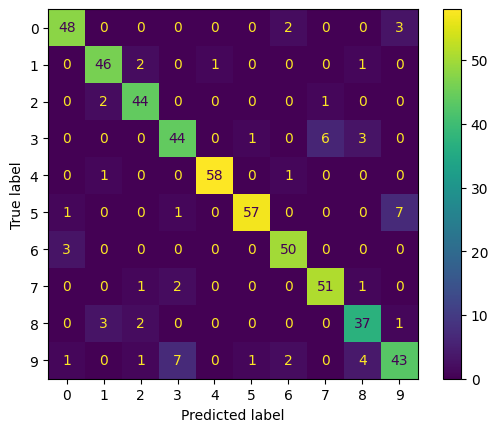

In [36]:
fig = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=digits.target_names)
fig.plot()
plt.show()